In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import wandb
plt.style.use('seaborn')

In [2]:
def smooth(scalars, weight=0.1):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed

In [3]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)


formatter = FuncFormatter(millions)

In [4]:
def plot_mean_se(runs, l, c, ls, ax, weight=0.1):
    xs = []
    ys = []
    for n, run in enumerate(runs):
        if 'eval rewards' in run.history().keys():
            data = run.history(keys=['eval rewards', 'training steps'])
        else:
            data = run.history(keys=['eval/mean_reward', 'global_step'])
        #data = run.history(keys=['total post explore steps', 'training steps'])
        if n!= 5:
            if 'training steps' not in data:
                x = data['global_step'].tolist()
            else:
                x = data['training steps'].tolist()
            #y = data['total post explore steps'].tolist()
            if 'eval rewards' not in data:
                y = data['eval/mean_reward'].tolist()
            else:
                y = data['eval rewards'].tolist()
            xs.append(x)
            ys.append(y)
        
    y_avg = np.mean(ys, axis=0)
    y_avg = smooth(y_avg, weight=weight)
    y_ste = np.std(ys, axis=0) / np.sqrt(len(ys))
    #for lava there are only 30 steps
    #x = x[:50]
    #y_avg = y_avg[:30]
    #y_ste = y_ste[:30]
    ax.plot(x, y_avg, label=l, color=c, ls=ls, linewidth=4)
    ax.xaxis.set_major_formatter(formatter)
    plt.fill_between(x, y_avg-y_ste, y_avg+y_ste, alpha=0.1, color=c)

In [5]:
def plot_group(group_runs, legend=[], color=[], shape=[], x_label="Environment Steps", y_label='Goal Reaching Rate', out_legend=False, in_legend=False, size=40, font_scale=5, weight=0.1, title=''):
    sns.set(font_scale=font_scale)
    if legend == []:
        raise ValueError('plz input legend')
    if color == []:
        raise ValueError('plz input legend')
    if shape == []:
        raise ValueError('plz input legend')
    plt.figure(figsize=(15, 10))
    plt.rcParams.update({'font.size': size})
    
    fig, ax = plt.subplots()
    
    for i, group in enumerate(group_runs):
        plot_mean_se(group, legend[i], color[i], shape[i], weight=weight, ax=ax)
    if out_legend:
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25),
                  fancybox=True, shadow=True, ncol=5)
    if in_legend:
        plt.legend()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

### PointUMaze

In [28]:
api = wandb.Api()
entity, project = "zhao666", "PointUMaze-v1_SAC"  # set to your entity and project 

In [29]:
group = []

In [31]:
filters = {
            "config.batch_size": 16,
            "config.lr": 0.001
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.batch_size': 16, 'config.lr': 0.001} 
Total runs: 5


In [32]:
group.append(runs)

In [33]:
api = wandb.Api()
entity, project = "zhao666", "NormalizedCEC"  # set to your entity and project 

In [35]:
filters = {
            "config.env": 'PointUMaze-v1',
            "config.k": 5,
            "config.tau": 0.1,
            "config.act_noise": 0.3,
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.env': 'PointUMaze-v1', 'config.k': 5, 'config.tau': 0.1, 'config.act_noise': 0.3} 
Total runs: 5


In [36]:
group.append(runs)

In [37]:
api = wandb.Api()
entity, project = "zhao666", "EMAC"  # set to your entity and project 

In [39]:
filters = {
            "config.env": 'PointUMaze-v1'
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.env': 'PointUMaze-v1'} 
Total runs: 5


In [40]:
group.append(runs)

<Figure size 1080x720 with 0 Axes>

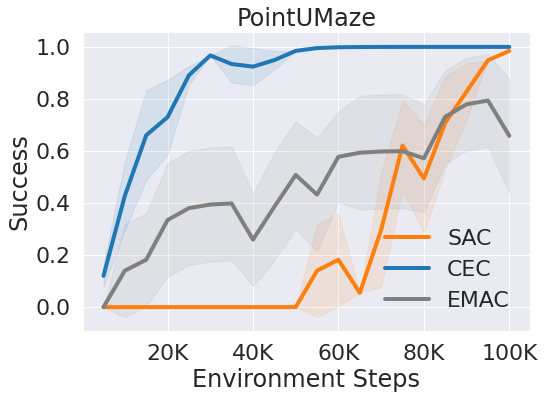

In [42]:
legend = ['SAC', 'CEC', 'EMAC']
color = ['tab:orange', 'tab:blue', 'tab:gray']
shape = ['solid', 'solid', 'solid']
plot_group(group, legend, color, shape, font_scale=2, weight=0.3, x_label='Environment Steps', y_label='Success', title='PointUMaze', in_legend=True)

### Point4Rooms

In [66]:
api = wandb.Api()
entity, project = "zhao666", "Point4Rooms-v2_SAC"  # set to your entity and project 

In [67]:
group = []

In [69]:
filters = {
            "config.batch_size": 32,
            "config.lr": 0.001,
            "config.num_steps": 100000
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.batch_size': 32, 'config.lr': 0.001, 'config.num_steps': 100000} 
Total runs: 5


In [70]:
group.append(runs)

In [71]:
api = wandb.Api()
entity, project = "zhao666", "NormalizedCEC"  # set to your entity and project 

In [73]:
filters = {
            "config.env": 'Point4Rooms-v2',
            "config.k": 5,
            "config.tau": 1,
            "config.act_noise": 0.3,
            "config.T": 3
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.env': 'Point4Rooms-v2', 'config.k': 5, 'config.tau': 1, 'config.act_noise': 0.3, 'config.T': 3} 
Total runs: 6


In [74]:
group.append(runs)

In [75]:
api = wandb.Api()
entity, project = "zhao666", "EMAC"

In [77]:
filters = {
            "config.env": 'Point4Rooms-v2'
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.env': 'Point4Rooms-v2'} 
Total runs: 5


In [78]:
group.append(runs)

<Figure size 1080x720 with 0 Axes>

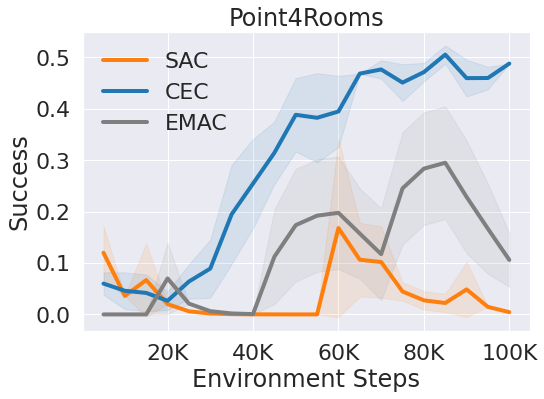

In [80]:
legend = ['SAC', 'CEC', 'EMAC']
color = ['tab:orange', 'tab:blue', 'tab:gray']
shape = ['solid', 'solid', 'solid']
plot_group(group, legend, color, shape, font_scale=2, weight=0.3, x_label='Environment Steps', y_label='Success', title='Point4Rooms', in_legend=True)

### InvertedPendulum

In [6]:
group = []

In [151]:
api = wandb.Api()
entity, project = "zhao666", "InvertedPendulum-v2_SAC"  # set to your entity and project 

In [153]:
filters = {
            "config.batch_size": 8,
            "config.lr": 0.001,
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.batch_size': 8, 'config.lr': 0.001} 
Total runs: 5


In [154]:
group.append(runs)

In [7]:
api = wandb.Api()
entity, project = "zhao666", "NormalizedCEC"  # set to your entity and project 

In [9]:
filters = {
            "config.env": 'InvertedPendulum-v2',
            "config.k": 5,
            "config.T": 5,
            "config.act_noise": 0.1,
            "config.tau": 10,
            "config.distance_threshold": 0.1
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.env': 'InvertedPendulum-v2', 'config.k': 5, 'config.T': 5, 'config.act_noise': 0.1, 'config.tau': 10, 'config.distance_threshold': 0.1} 
Total runs: 5


In [10]:
group.append(runs)

In [159]:
api = wandb.Api()
entity, project = "zhao666", "EMAC"

In [161]:
filters = {
    "config.env": 'InvertedPendulum-v2'
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.env': 'InvertedPendulum-v2'} 
Total runs: 5


In [162]:
group.append(runs)

<Figure size 1080x720 with 0 Axes>

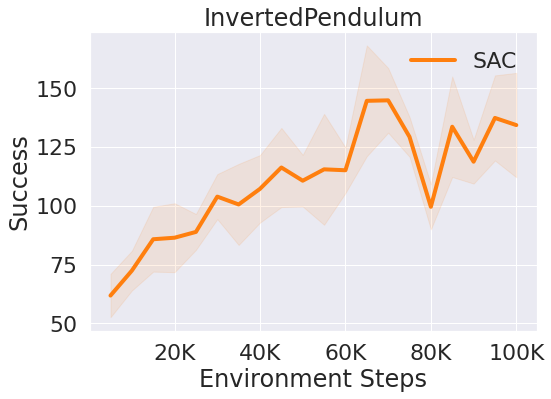

In [11]:
legend = ['SAC', 'CEC', 'EMAC']
color = ['tab:orange', 'tab:blue', 'tab:gray']
shape = ['solid', 'solid', 'solid']
plot_group(group, legend, color, shape, font_scale=2, weight=0.3, x_label='Environment Steps', y_label='Success', title='InvertedPendulum', in_legend=True)

No handles with labels found to put in legend.


<Figure size 1080x720 with 0 Axes>

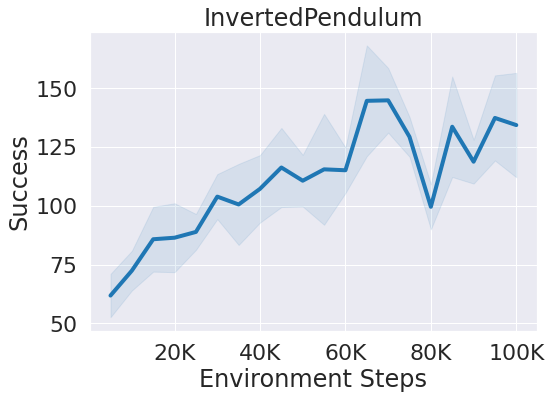

In [13]:
legend = ['']
color = ['tab:blue']
shape = ['solid']
plot_group(group, legend, color, shape, font_scale=2, weight=0.3, x_label='Environment Steps', y_label='Success', title='InvertedPendulum', in_legend=True)

### FetchReach

In [129]:
api = wandb.Api()
entity, project = "zhao666", "FetchReach-v1_SAC"  # set to your entity and project 

In [130]:
group = []

In [132]:
filters = {
            "config.batch_size": 32,
            "config.lr": 0.001,
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.batch_size': 32, 'config.lr': 0.001} 
Total runs: 5


In [133]:
group.append(runs)

In [140]:
api = wandb.Api()
entity, project = "zhao666", "NormalizedCEC"  # set to your entity and project 

In [142]:
filters = {
            "config.env": 'FetchReach-v1',
            "config.distance_threshold": 0.5,
            "config.act_noise": 0.1,
            "config.T": 3,
            "config.tau": 1
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.env': 'FetchReach-v1', 'config.distance_threshold': 0.5, 'config.act_noise': 0.1, 'config.T': 3, 'config.tau': 1} 
Total runs: 5


In [143]:
group.append(runs)

In [144]:
api = wandb.Api()
entity, project = "zhao666", "EMAC" 

In [146]:
filters = {
            "config.env": 'FetchReach-v1'
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.env': 'FetchReach-v1'} 
Total runs: 5


In [147]:
group.append(runs)

<Figure size 1080x720 with 0 Axes>

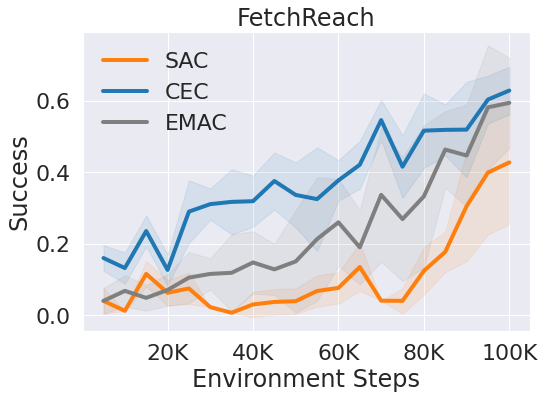

In [149]:
legend = ['SAC', 'CEC', 'EMAC']
color = ['tab:orange', 'tab:blue', 'tab:gray']
shape = ['solid', 'solid', 'solid']
plot_group(group, legend, color, shape, font_scale=2, weight=0.3, x_label='Environment Steps', y_label='Success', title='FetchReach', in_legend=True)

### MountainCarContinuous

In [6]:
api = wandb.Api()
entity, project = "zhao666", "MountainCarContinuous-v0_SAC"  # set to your entity and project 

In [20]:
group = []

In [9]:
filters = {
            "config.batch_size": 16
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.batch_size': 16} 
Total runs: 5


In [16]:
group.append(runs)

In [21]:
api = wandb.Api()
entity, project = "zhao666", "NormalizedCECsparseMonCar"  # set to your entity and project 

In [23]:
filters = {
            "config.distance_threshold": 0.1,
            "config.act_noise": 0.1,
            "config.T": 3,
            "config.tau": 10,
            "config.k": 3,
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.distance_threshold': 0.1, 'config.act_noise': 0.1, 'config.T': 3, 'config.tau': 10, 'config.k': 3} 
Total runs: 5


In [24]:
group.append(runs)

In [15]:
api = wandb.Api()
entity, project = "zhao666", "EMAC" 

In [17]:
filters = {
            "config.env": 'MountainCarContinuous-v0'
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.env': 'MountainCarContinuous-v0'} 
Total runs: 5


In [18]:
group.append(runs)

<Figure size 1080x720 with 0 Axes>

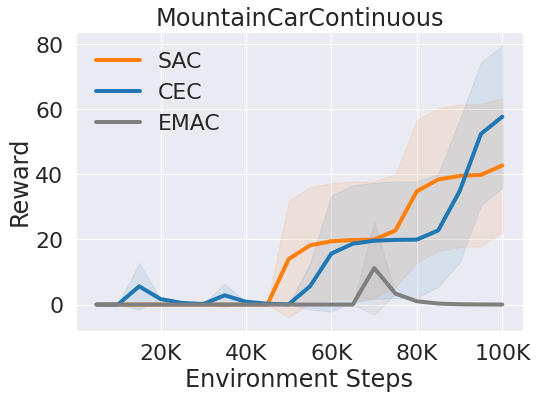

In [35]:
legend = ['SAC', 'CEC', 'EMAC']
color = ['tab:orange', 'tab:blue', 'tab:gray']
shape = ['solid', 'solid', 'solid']
plot_group(group, legend, color, shape, font_scale=2, weight=0.3, x_label='Environment Steps', y_label='Reward', title='MountainCarContinuous', in_legend=True)

<Figure size 1080x720 with 0 Axes>

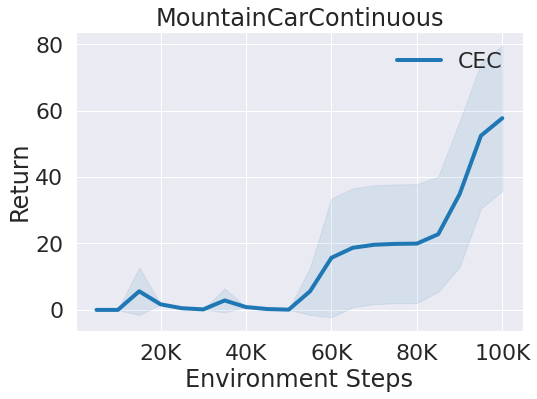

In [26]:
legend = ['CEC']
color = ['tab:blue']
shape = ['solid']
plot_group(group, legend, color, shape, font_scale=2, weight=0.3, x_label='Environment Steps', y_label='Return', title='MountainCarContinuous', in_legend=True)

### SafetyGym

In [6]:
api = wandb.Api()
entity, project = "zhao666", "Safe_SAC"  # set to your entity and project 

In [7]:
group = []

In [9]:
filters = {
            "config.batch_size": 32,
            "config.lr": 0.01
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.batch_size': 32, 'config.lr': 0.01} 
Total runs: 5


In [10]:
group.append(runs)

In [14]:
api = wandb.Api()
entity, project = "zhao666", "SafetyGymWithWallsNoNormalWithMoreSensors39Walls"  # set to your entity and project 

In [16]:
filters = {
            "config.exploration": 'random',
            "config.distance_threshold": 0.1,
            "config.k": 5,
            "config.T": 1,
            "config.tau": 0.1
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.exploration': 'random', 'config.distance_threshold': 0.1, 'config.k': 5, 'config.T': 1, 'config.tau': 0.1} 
Total runs: 5


In [17]:
group.append(runs)

In [18]:
api = wandb.Api()
entity, project = "zhao666", "EMAC" 

In [20]:
filters = {
            "config.env": 'Safe'
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.env': 'Safe'} 
Total runs: 5


In [21]:
group.append(runs)

<Figure size 1080x720 with 0 Axes>

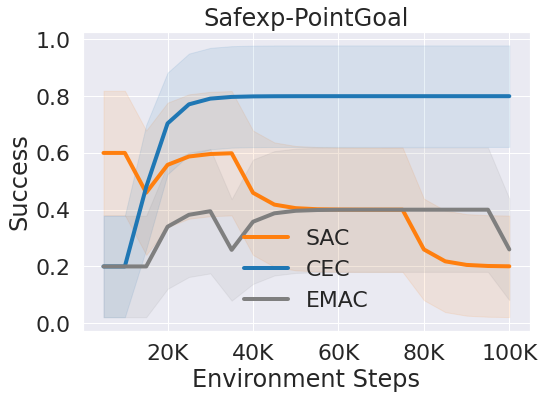

In [25]:
legend = ['SAC', 'CEC', 'EMAC']
color = ['tab:orange', 'tab:blue', 'tab:gray']
shape = ['solid', 'solid', 'solid']
plot_group(group, legend, color, shape, font_scale=2, weight=0.3, x_label='Environment Steps', y_label='Success', title='Safexp-PointGoal', in_legend=True)

### SafetyGymCar

In [6]:
api = wandb.Api()
entity, project = "zhao666", "Safe_SACcar"  # set to your entity and project 

In [7]:
group = []

In [9]:
filters = {
            "config.batch_size": 32,
            "config.lr": 0.01
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.batch_size': 32, 'config.lr': 0.01} 
Total runs: 5


In [10]:
group.append(runs)

In [11]:
api = wandb.Api()
entity, project = "zhao666", "SafetyGymCarRP"  # set to your entity and project 

In [13]:
filters = {
            "config.exploration": 'random',
            "config.distance_threshold": 0.1,
            "config.k": 1,
            "config.T": 3,
            "config.tau": 10
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.exploration': 'random', 'config.distance_threshold': 0.1, 'config.k': 1, 'config.T': 3, 'config.tau': 10} 
Total runs: 5


In [14]:
group.append(runs)

In [15]:
api = wandb.Api()
entity, project = "zhao666", "EMACsafeCar" 

In [17]:
filters = {
            "config.env": 'Safe'
}
runs = api.runs(entity + "/" + project, filters=filters, per_page=300) 
print('Configs: {} \nTotal runs: {}'.format(runs.filters, runs.length))

Configs: {'config.env': 'Safe'} 
Total runs: 5


In [18]:
group.append(runs)

<Figure size 1080x720 with 0 Axes>

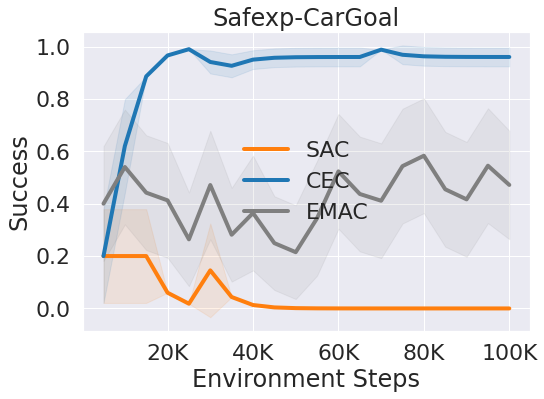

In [20]:
legend = ['SAC', 'CEC', 'EMAC']
color = ['tab:orange', 'tab:blue', 'tab:gray']
shape = ['solid', 'solid', 'solid']
plot_group(group, legend, color, shape, font_scale=2, weight=0.3, x_label='Environment Steps', y_label='Success', title='Safexp-CarGoal', in_legend=True)

In [1]:
import matplotlib.pyplot as plt

In [2]:
f_long = lambda x : 2 * x + 2 ** x
f_short = lambda x : 2 * (2 * x)

In [3]:
x = [i for i in range(10)]

In [4]:
y_long = [f_long(a) for a in x]
y_short = [f_short(a) for a in x]

Text(0, 0.5, 'Needed steps')

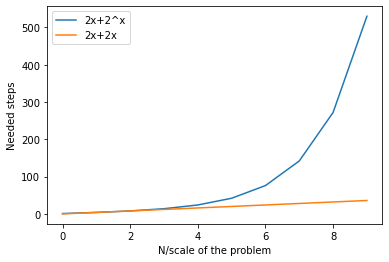

In [5]:
plt.plot(x, y_long, label='2x+2^x')
plt.plot(x, y_short, label='2x+2x')
plt.legend()
plt.xlabel('N/scale of the problem')
plt.ylabel('Needed steps')